Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_w = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Windows_app/msft.csv")

In [3]:
df_w.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


# Lets get the basic info about our dataset

In [4]:
def basic_info(data):
    categorical = []
    numerical = []
    print("Size = ", data.size)
    print("Shape = ", data.shape)
    data.info()
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    return categorical, numerical

In [5]:
basic_info(df_w)

Size =  31932
Shape =  (5322, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


(['Name', 'Category', 'Date', 'Price'], ['Rating', 'No of people Rated'])

Lets make Date into Datetime category

In [6]:
df_w['Date'] = pd.to_datetime(df_w['Date'])

In [7]:
categorical, numerical = basic_info(df_w)

Size =  31932
Shape =  (5322, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                5321 non-null   object        
 1   Rating              5321 non-null   float64       
 2   No of people Rated  5322 non-null   int64         
 3   Category            5321 non-null   object        
 4   Date                5321 non-null   datetime64[ns]
 5   Price               5321 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 249.6+ KB


In [8]:
categorical

['Name', 'Category', 'Price']

In [9]:
numerical

['Rating', 'No of people Rated', 'Date']

In [10]:
df_w.isnull().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [11]:
df_w = df_w.dropna()

In [12]:
basic_info(df_w)

Size =  31926
Shape =  (5321, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5321 entries, 0 to 5320
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                5321 non-null   object        
 1   Rating              5321 non-null   float64       
 2   No of people Rated  5321 non-null   int64         
 3   Category            5321 non-null   object        
 4   Date                5321 non-null   datetime64[ns]
 5   Price               5321 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 291.0+ KB


(['Name', 'Category', 'Price'], ['Rating', 'No of people Rated', 'Date'])

# General Exploration

#### Lets see what we retrive from Rating

In [13]:
df_w['Rating'].value_counts()

4.0    1299
5.0     968
4.5     900
3.5     844
3.0     615
2.5     276
1.0     201
2.0     156
1.5      62
Name: Rating, dtype: int64

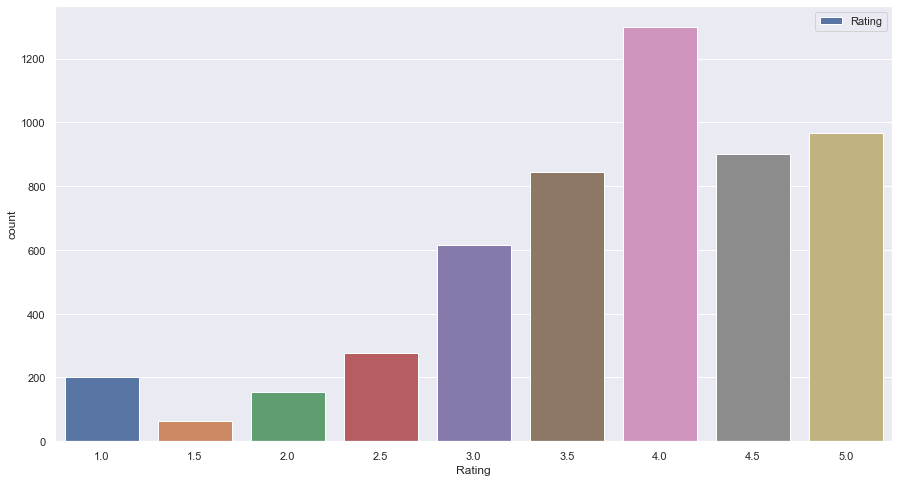

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(df_w['Rating'], label = "Rating")
plt.legend()
plt.show()

We get that most of the apps have been rated 4.0

#### Lets see what info we can get from Category

In [15]:
df_w['Category'].value_counts()

Music                      753
Books                      707
Business                   679
Health and Fitness         527
Developer Tools            500
Lifestyle                  492
News and Weather           483
Kids and Family            345
Social                     328
Food and Dining            166
Navigation and Maps        154
Multimedia Design          117
Government and Politics     70
Name: Category, dtype: int64

lets see this representation in the form of a Countplot

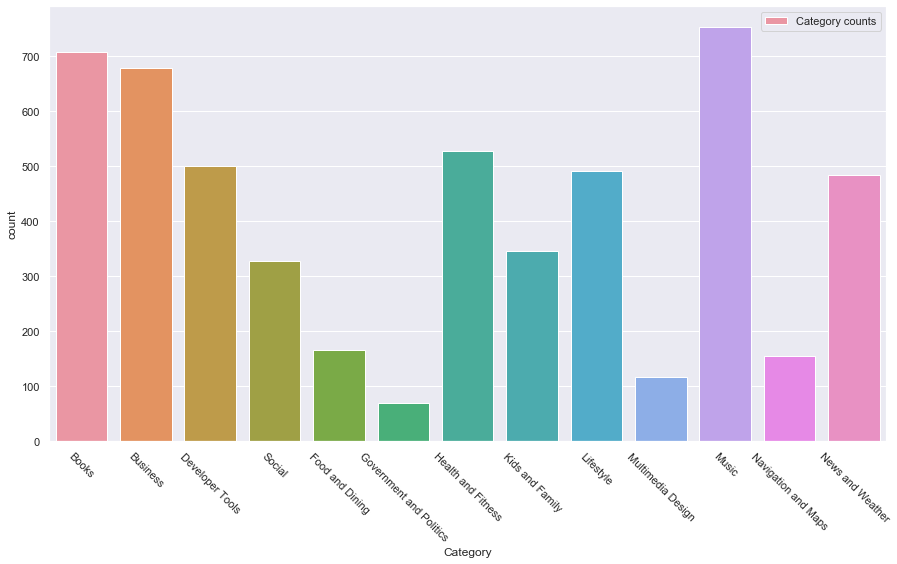

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(df_w['Category'], label = "Category counts")
plt.xticks(rotation = -45)
plt.legend()
plt.show()

#### Lets see variation of rating in each category

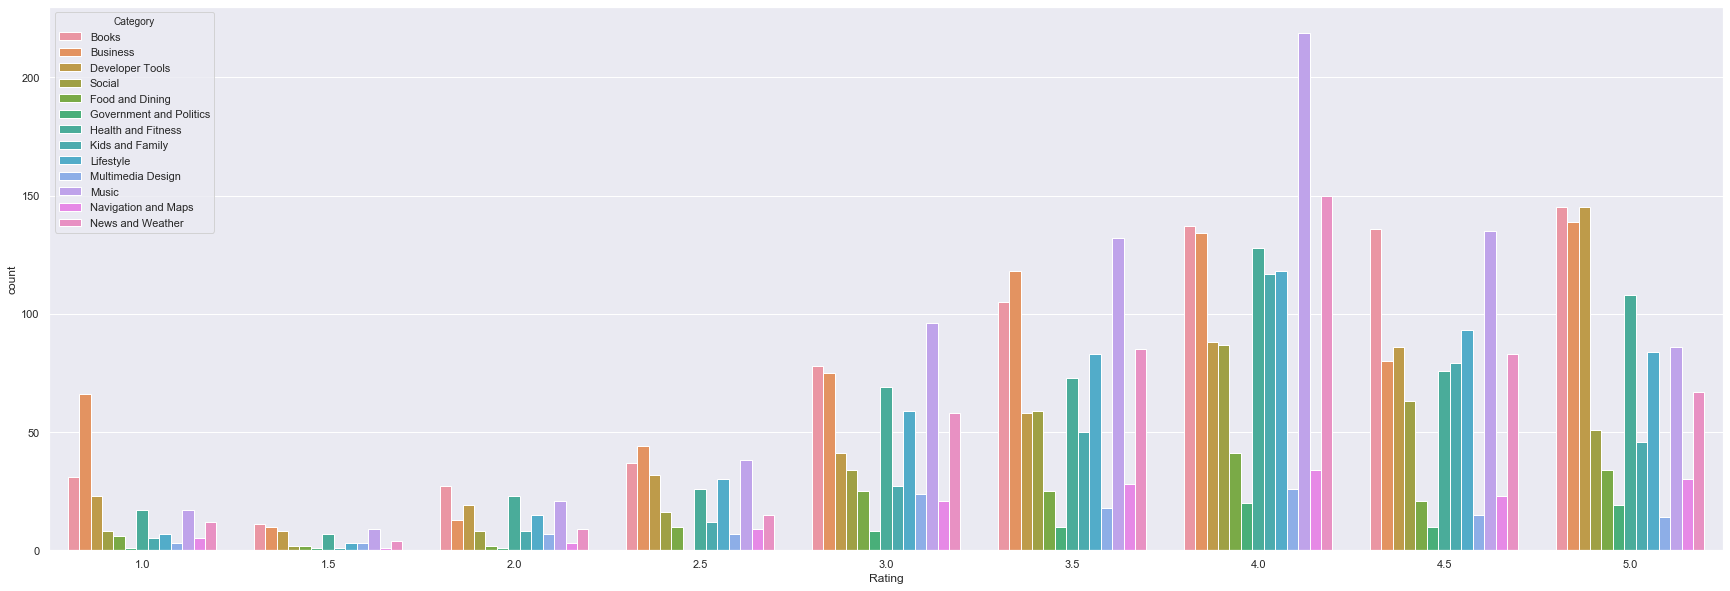

In [17]:
plt.figure(figsize=(30,10))
sns.countplot(df_w['Rating'] ,hue = df_w['Category'])

#### Lets see what information we can derive from Price

In [18]:
df_w['Price'].value_counts()

Free          5163
₹ 269.00        55
₹ 54.00         14
₹ 549.00        10
₹ 109.00         9
₹ 164.00         8
₹ 144.00         5
₹ 219.00         5
₹ 69.00          4
₹ 1,099.00       4
₹ 79.00          4
₹ 154.00         3
₹ 1,624.00       3
₹ 99.00          3
₹ 59.00          2
₹ 489.00         1
₹ 64.00          1
₹ 824.00         1
₹ 114.00         1
₹ 319.00         1
₹ 1,899.00       1
₹ 699.00         1
₹ 89.50          1
₹ 94.00          1
₹ 209.00         1
₹ 434.00         1
₹ 624.00         1
₹ 54.50          1
₹ 134.00         1
₹ 194.00         1
₹ 279.00         1
₹ 1,349.00       1
₹ 1,521.80       1
₹ 139.00         1
₹ 2,599.00       1
₹ 324.00         1
₹ 119.00         1
₹ 2,149.00       1
₹ 1,149.00       1
₹ 5,449.00       1
₹ 189.00         1
₹ 574.00         1
₹ 299.00         1
₹ 329.40         1
Name: Price, dtype: int64

We have to do some changes here again so that if i want to work with them. 1st Free will be converted to 0, 2nd "₹ " will be replaced by "" (no space) and the whole will be converted into float value

In [19]:
def change_price(x):
    if x == "Free":
        #print(x)
        x = 0.0
        return x
    else:
        #print(x)
        x = x[2:]
        x = x.replace(",", "")
        x = float(x)
        return x

In [20]:
df_w['Price'] = df_w['Price'].apply(lambda x: change_price(x))

In [21]:
df_w['Price'].dtype

dtype('float64')

In [22]:
cat, num = basic_info(df_w)

Size =  31926
Shape =  (5321, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5321 entries, 0 to 5320
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                5321 non-null   object        
 1   Rating              5321 non-null   float64       
 2   No of people Rated  5321 non-null   int64         
 3   Category            5321 non-null   object        
 4   Date                5321 non-null   datetime64[ns]
 5   Price               5321 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 451.0+ KB


In [23]:
cat

['Name', 'Category']

In [24]:
num

['Rating', 'No of people Rated', 'Date', 'Price']

Nowe we will try to implement a model which will try to predict the rating.

# Regression models for making Rating predictions

First we will try to vizualise all the numerical dtypes columns (other than Date), and plot them in box plots to get info about outliers

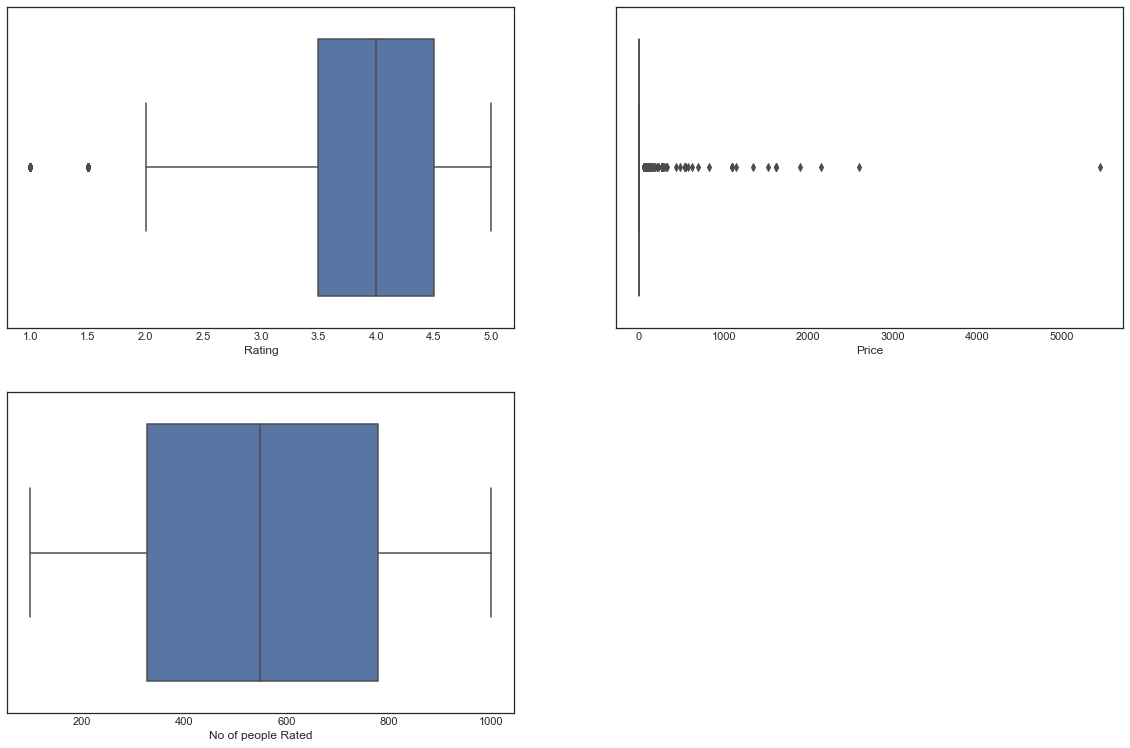

In [25]:
plt.figure(figsize=(20,13))
plt.style.use('seaborn-white')
ax = plt.subplot(221)
sns.boxplot(df_w['Rating'])
ax = plt.subplot(222)
sns.boxplot(df_w['Price'])
ax = plt.subplot(223)
sns.boxplot(df_w['No of people Rated'])

We see that both Rating and Price have outliers, so we will emilinate the outliers by using interquartile range for Rating, I have thought of dealing with Price in a different way

In [26]:
"""Q1 = df_w['Rating'].quantile(0.25)
Q3 = df_w['Rating'].quantile(0.75)

IQR2 = Q3 - Q1

outlier_remover2 = (df_w['Rating'] >=Q1-1.5*IQR2) * (df_w['Rating']<= Q3 + 1.5*IQR2)
df_w = df_w.loc[outlier_remover2]"""

"Q1 = df_w['Rating'].quantile(0.25)\nQ3 = df_w['Rating'].quantile(0.75)\n\nIQR2 = Q3 - Q1\n\noutlier_remover2 = (df_w['Rating'] >=Q1-1.5*IQR2) * (df_w['Rating']<= Q3 + 1.5*IQR2)\ndf_w = df_w.loc[outlier_remover2]"

In [27]:
df_w.shape

(5321, 6)

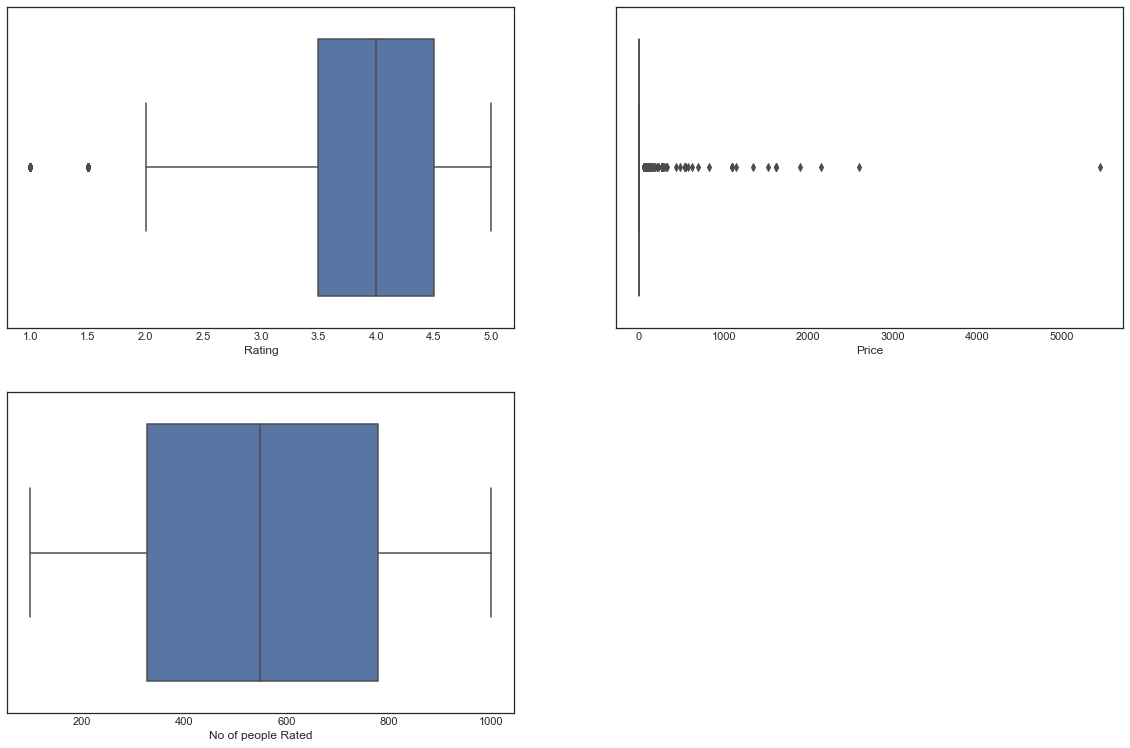

In [28]:
plt.figure(figsize=(20,13))
plt.style.use('seaborn-white')
ax = plt.subplot(221)
sns.boxplot(df_w['Rating'])
ax = plt.subplot(222)
sns.boxplot(df_w['Price'])
ax = plt.subplot(223)
sns.boxplot(df_w['No of people Rated'])

In [29]:
df_w.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,2014-07-01,0.0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,0.0
2,BookViewer,3.5,593,Books,2016-02-29,0.0
3,Brick Instructions,3.5,684,Books,2018-01-30,0.0
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,0.0


### Now I will try these two things which I think will be more flexible for calcualtion...
### If an app is free, it will remain 0.0, else it will be 1.0 depicting that the app isn't free
### Then I will create dummy of Category and with that a new dataframe so as to do the regression model

In [30]:
def free_or_not(x):
    if x == 0.0:
        return 0.0
    else:
        return 1.0

In [31]:
df_w['Price'] = df_w['Price'].apply(lambda x: free_or_not(x))

In [32]:
df_w['Price'].value_counts()

0.0    5163
1.0     158
Name: Price, dtype: int64

Lets make function which will return a new dataframe with dummy concatinated

In [33]:
def making_new_df(data, columnlist):
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        #print(dummy)
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

In [34]:
df_w2 = making_new_df(df_w, ['Category'])

In [35]:
df_w2

,Name,Rating,No of people Rated,Category,Date,Price,Books,Business,Developer Tools,Food and Dining,Government and Politics,Health and Fitness,Kids and Family,Lifestyle,Multimedia Design,Music,Navigation and Maps,News and Weather
0,Dynamic Reader,3.5,268,Books,2014-07-01,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,0.0,1,0,0,0,0,0,0,0,0,0,0,0
2,BookViewer,3.5,593,Books,2016-02-29,0.0,1,0,0,0,0,0,0,0,0,0,0,0
3,Brick Instructions,3.5,684,Books,2018-01-30,0.0,1,0,0,0,0,0,0,0,0,0,0,0
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,0.0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,Get Color,3.0,785,Developer Tools,2019-08-08,1.0,0,0,1,0,0,0,0,0,0,0,0,0
5317,JS King,1.0,720,Developer Tools,2018-07-19,1.0,0,0,1,0,0,0,0,0,0,0,0,0
5318,MQTTSniffer,2.5,500,Developer Tools,2017-10-04,1.0,0,0,1,0,0,0,0,0,0,0,0,0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,2019-11-18,1.0,0,0,1,0,0,0,0,0,0,0,0,0


We won't be needing Name and Category and Date & No of people Ratedfor regression model

In [36]:
df_w2 = df_w2.drop(['Name', "Category", "Date", "No of people Rated"], axis = 1)

In [37]:
df_w2

,Rating,Price,Books,Business,Developer Tools,Food and Dining,Government and Politics,Health and Fitness,Kids and Family,Lifestyle,Multimedia Design,Music,Navigation and Maps,News and Weather
0,3.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,3.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
2,3.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0
3,3.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,3.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0
5317,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0
5318,2.5,1.0,0,0,1,0,0,0,0,0,0,0,0,0
5319,4.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0


Now our model is ready and we can go for train-test-split and making models. I will try to make linear regression, random forest regressor and SVM

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df_w2.loc[:, df_w2.columns != 'Rating']
y = df_w2['Rating']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
y_train

1702    5.0
4975    3.0
3528    3.5
433     5.0
3353    4.5
       ... 
3092    4.0
3772    4.5
5191    4.0
5226    1.0
860     4.0
Name: Rating, Length: 3724, dtype: float64

#### Linear Regression model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
model = lr.fit(X_train, y_train)

In [45]:
y_predict = model.predict(X_test)

In [46]:
predict_dataframe = pd.DataFrame(data={"Predicted": y_predict, "Actual": y_test})

In [47]:
predict_dataframe

,Predicted,Actual
1878,3.852083,5.0
5035,3.813253,5.0
3753,3.597701,4.0
4724,3.813253,4.0
555,3.891797,4.0
...,...,...
2465,3.773684,4.0
1113,3.676760,4.0
3540,3.842179,5.0
5048,3.813253,3.0


In [48]:
model.score(X_test, y_test)

0.044023340461519345

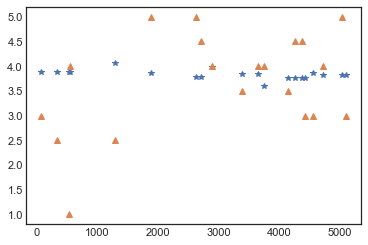

In [49]:
plt.plot(predict_dataframe["Predicted"][:20], "*")
plt.plot(predict_dataframe['Actual'][:20], "^")
plt.show()

Wow, we can surely see that Linear regression didn't perform well at all

#### Lets try Ridge regression

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [51]:
ridge = Ridge()

In [52]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv =5)

In [53]:
modelR = ridge_regressor.fit(X_train, y_train)

In [54]:
y_predict_R = modelR.predict(X_test)

In [55]:
rigid_df = pd.DataFrame(data = {"Predicted": y_predict_R, "Actual": y_test})

In [56]:
rigid_df

,Predicted,Actual
1878,3.847560,5.0
5035,3.813762,5.0
3753,3.611280,4.0
4724,3.813762,4.0
555,3.885894,4.0
...,...,...
2465,3.774644,4.0
1113,3.673171,4.0
3540,3.842253,5.0
5048,3.813762,3.0


In [57]:
modelR.score(X_test, y_test)

-0.9257110501314769

More poor than Linear

#### Lets try Support Vector Regression

In [58]:
from sklearn.svm import SVR

In [59]:
svr = SVR()

In [60]:
model_svr = svr.fit(X_train, y_train)

In [61]:
y_predict_svr = model_svr.predict(X_test)

In [62]:
svr_df = pd.DataFrame(data = {"Predicted": y_predict_svr, "Actual": y_test})

In [63]:
svr_df

,Predicted,Actual
1878,3.899744,5.0
5035,3.900107,5.0
3753,3.599782,4.0
4724,3.900107,4.0
555,4.099926,4.0
...,...,...
2465,3.899747,4.0
1113,3.900107,4.0
3540,3.900050,5.0
5048,3.900107,3.0


In [64]:
model_svr.score(X_test, y_test)

0.01910173222840239

At least good than Ridge

#### Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rfr = RandomForestRegressor()

In [67]:
modef_rfr = rfr.fit(X_train, y_train)

In [68]:
y_predict_rfr = modef_rfr.predict(X_test)

In [69]:
rfr_df = pd.DataFrame(data={"Predicted": y_predict_rfr, "Actual": y_test})

In [70]:
rfr_df

,Predicted,Actual
1878,3.853870,5.0
5035,3.818055,5.0
3753,3.611969,4.0
4724,3.818055,4.0
555,3.856195,4.0
...,...,...
2465,3.775349,4.0
1113,3.750912,4.0
3540,3.838150,5.0
5048,3.818055,3.0


In [71]:
modef_rfr.score(X_test, y_test)

0.05582564181718175

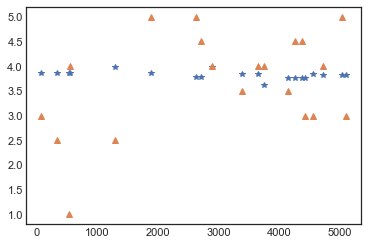

In [72]:
plt.plot(rfr_df["Predicted"][:20], "*")
plt.plot(rfr_df['Actual'][:20], "^")
plt.show()

### The scores are:

In [73]:
print("Linear Regression score is: ", model.score(X_test, y_test))
print("Ridge Regression score is: ", modelR.score(X_test, y_test))
print("Support Vector Regression score is: ", model_svr.score(X_test, y_test))
print("Random Forest Regression score is: ", modef_rfr.score(X_test, y_test))

Linear Regression score is:  0.044023340461519345
Ridge Regression score is:  -0.9257110501314769
Support Vector Regression score is:  0.01910173222840239
Random Forest Regression score is:  0.05582564181718175


#### I know all the socres aren't good but still I just wanted to show how you can implement them. If you have any other tips to increase the score, do tell. I would love to hear and implement them

# Further Exploration

#### Since we have converted Price into 1 and 0 form where 0 implies the app is free, and 1 means the app is paid, now we will see this in a pie chart representation

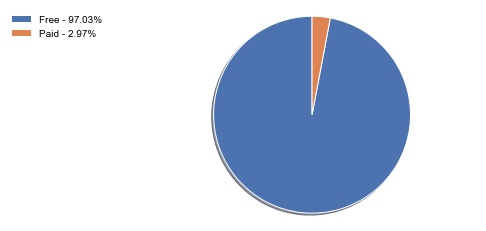

In [77]:
fig, ax=plt.subplots()
plt.rcParams['text.color'] = 'black'
labels = ['Free', "Paid"]
sizes = df_w['Price'].value_counts()
percent = 100*np.array(sizes)/np.array(sizes).sum() #to show % of every category
patches, texts = ax.pie(sizes, shadow=True, startangle=90)
labels = ['{0} - {1:1.2f}%'.format(i,j) for i, j in zip(labels,percent)]
sort_legend = False
ax.axis('equal')

plt.legend(patches, labels, loc= 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
ax.axis('equal')
plt.show()

We see that only approx only 3% of the apps are paid. And rest are free

In [88]:
df_w['Date'].dt.year.unique() # use dt to use attributes such as year, month and more

array([2014, 2016, 2018, 2017, 2012, 2013, 2015, 2019, 2020, 2011, 2010],
      dtype=int64)

#### Lets try plotting a graph where we can see in which year, No of people Rated

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
[3437, 19310, 182980, 296449, 322020, 324753, 547455, 433195, 444461, 259434, 102627]


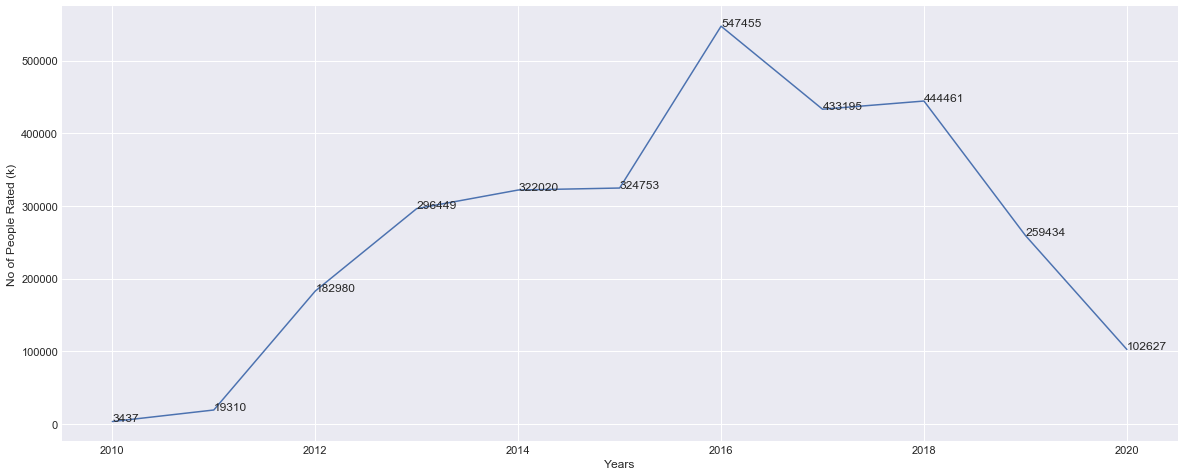

In [105]:
unique_dates = df_w['Date'].dt.year.unique()
#df_new = df_w[df_w['Date'].dt.year == 2014]
#df_new
unique_dates.sort()
print(unique_dates)
sum_array = list()
for i in unique_dates:
    df_new = df_w[df_w['Date'].dt.year == i]
    sum_array.append(sum(df_new['No of people Rated']))

print(sum_array)

plt.figure(figsize = (20,8))
plt.style.use('seaborn-darkgrid')

plt.plot(unique_dates, sum_array)
plt.xlabel("Years")
plt.ylabel("No of People Rated (k)")
for x, y in zip(unique_dates, sum_array):
    plt.text(x, y, str(y))

In [94]:
sns.regplot(df_w['Date'], df_w[''])

array([], dtype=float64)